### Как сдавать работу

Сейчас в самом разгаре обсуждение подходов к решению второго задания https://github.com/rolling-scopes-school/ml-intro/blob/2021/2_linear_regression/seminar_and_homework.ipynb, дедлайн следующий понедельник 8 февраля в 19.00 (GMT+3).  Недавно были внесены некоторые изменение, поэтому обновите пожалуйста ваши ноутбуки!
С чего начать? Посмотрите материалы ко второму модулю по теории Линейной Регрессии. Постарайтесь понять матричную форму записи основных уравнений (как делаются предсказания, как считается ошибка). Затем можно приступать к заданию.
Как выполнять и куда отправлять? Задания и критерии выполнения явно написаны в ноутбуке, читайте условие внимательно.  Проверка осуществляется кросс-чеком, вот тут подробная информация https://docs.rs.school/#/cross-check-flow. Когда вы решите, ноутбук готов, выкладывайте его на свой гитхаб в закрытый репозиторий и отправляйте ссылку в Cross-Check: Submit -> Solution URL на платформе https://app.rs.school/. После чего НЕ вносите никаких изменений в ваше решение, иначе оно проверятся на будет. Как только пройдет срок сдачи, открываете свой репозиторий и тем самым даете доступ другим проверяющим к нему.

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# Initial data analysis and Linear Regression

This assignment is dedicated to Linear regression. By focusing on prediction different features of football players you understand the mathematics behind it and see the usefulness of main data analysis libraries.

**Materials**
- [Documentation](http://docs.scipy.org/doc/) libraries Numpy and SciPy
- [Documentation](http://matplotlib.org/) library Matplotlib 
- [Documentation](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) library Pandas
- [Pandas Cheat Sheet](http://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/)
- [Documentation](http://stanford.edu/~mwaskom/software/seaborn/) library Seaborn 

**Resources**
- In this notebook we will use *FIFA 19 complete player dataset* which is taken from [here](https://www.kaggle.com/karangadiya/fifa19)

## Part 1. Initial data analysis with Pandas

Importing libraries.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Graphics in Retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina' 

%matplotlib inline

Load the data. Table *data.csv* should be in the same directory as this notebook.

In [ ]:
data = pd.read_csv("data.csv", index_col='ID')

## path to the df in GDrive
# data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/RS_School/ml-intro-2021/ml-intro-2021/2_linear_regression/data.csv", 
#                    index_col='ID')

The first thing you need to do with a dataframe after loading is to look at first few records. This way you can make sure that you have parsed it correctly. Moreover, you can get acquainted with the data, look at the features and their type (categorical, numerical, text ...).

They you may check whether the data has missing values inside. Depending on the problem type and percentage of missing values you can either fill them with some value or drop columns/rows having null values.

After that you may want to look closer at some features. You can draw a histogram for defining a feature distribution (normal, power or some other). Also with the help of histogram you can find values which are really differ from the rest, we call them **outliers**. Histograms can be plotted by *hist* method of Pandas DataFrame.

**Example 1** Let's look at first 5 rows of data using method *head* for DataFrame data.

In [ ]:
data.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18207.0,9103.000000,5256.052511,0.0,4551.5,9103.0,13654.5,18206.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0
Crossing,18159.0,49.734181,18.364524,5.0,38.0,54.0,64.0,93.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  

Unfortunately the number of columns exceeds the maximum visible default value in Pandas. Use the magic line above to remove this restriction.

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Much better now.

**Example 2** Print total player number and top-10 columns containing the most number of null values.

In [ ]:
print(f"Total number of players in dataset {data.shape[0]}")

Total number of players in dataset 18207


In [ ]:
from tabulate import tabulate

top = 15
print(tabulate(
    sorted(list(zip(data.columns, data.isnull().sum(), data.isnull().sum() / data.shape[0] * 100)), key=lambda x: -x[2])[:top], 
    headers=['col_name', 'null_cnt', 'null_perc']))

col_name       null_cnt    null_perc
-----------  ----------  -----------
Loaned From       16943      93.0576
LS                 2085      11.4516
ST                 2085      11.4516
RS                 2085      11.4516
LW                 2085      11.4516
LF                 2085      11.4516
CF                 2085      11.4516
RF                 2085      11.4516
RW                 2085      11.4516
LAM                2085      11.4516
CAM                2085      11.4516
RAM                2085      11.4516
LM                 2085      11.4516
LCM                2085      11.4516
CM                 2085      11.4516


**Example 3**. Let's built a histogram of weight distribution in kgs from footbal players data. Follow steps:
- Extract weight value from string (column Weight).
- Convert *Weight* column to float type.
- Get rid of null values in weight column, use median column value instead of them.
- Convert pounds to kilograms
- Finally use method *hist* for DataFrame *data* with arguments *column=Weight* (we look at this feature distribution)

In [ ]:
print(f"Weight column type is '{data['Weight'].dtype}'")

Weight column type is 'object'


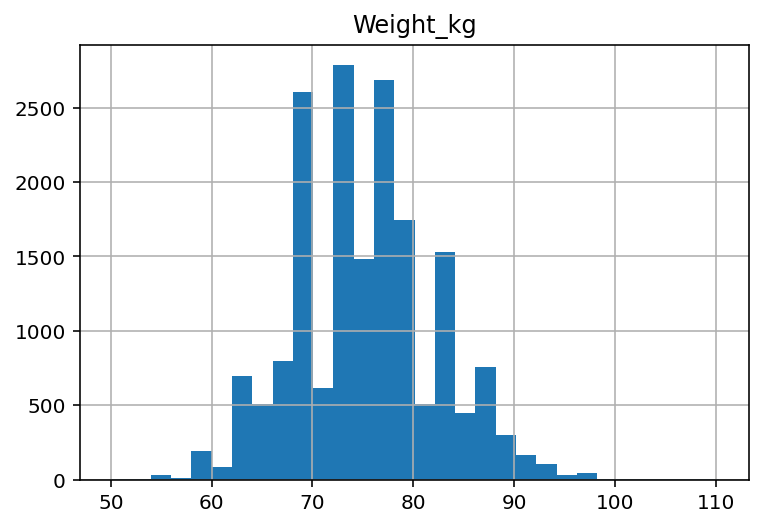

In [7]:
data['Weight_float'] = data['Weight'].str.extract(r'([0-9]+)lbs').astype(float)
data['Weight_float'].fillna(data['Weight_float'].median())
POUND_TO_KILO = 0.454
data['Weight_kg'] = data.apply(lambda row: row['Weight_float'] * POUND_TO_KILO, axis=1)
data.hist(column='Weight_kg', bins=30)
plt.show()

**Task 1 (1 point)**. Built a histogram of the height distribution in *meters* from footbal player data. Remember that height is in format *feet* '*inches*.  Instead of filling null values with some constant just drop them. Use *.dropna* for specified column.

In [ ]:
data.Height.isnull().sum()

48

In [ ]:
# print("This program will convert a height given meters to a height given in feet and inches.")
# meters = float(input("Enter height in meters:"))
# meters_in_ft = meters // .3048
# meters_in_in = meters_in_ft % 12
# print("The height is", meters_in_ft, "feet and", meters_in_in, "inches")

In [ ]:
# inches = meters / .3048 % 1 * 12

In [ ]:
# Your code here

data.dropna(subset=['Height'], axis = 0, inplace=True)
data['Height'] = data['Height'].str.split("'")
data['Height'] = data['Height'].apply(lambda row: float(row[0]) * 0.3048 + float(row[1]) * 0.0254)

Effective way to visualize the relationship between two features is to draw a simple _scatter plot_. The position of each dot on the horizontal and vertical axis indicates values for an individual data point.

**Example 4.** Visualize the dependence of _Strength_  on _Weight_kg_.

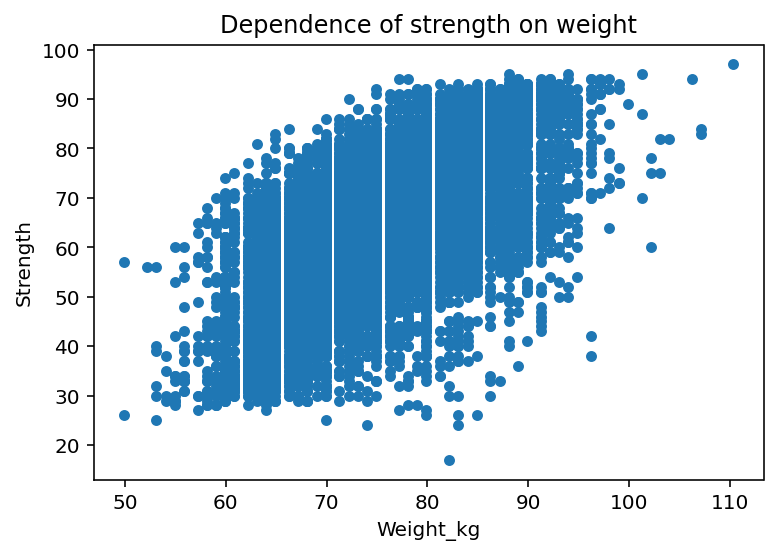

In [ ]:
data.plot.scatter(x='Weight_kg', y='Strength')
plt.title('Dependence of strength on weight')
plt.show()

One more effective way of initial data analysis is to plot pairwise feature dependencies. That simply combines already considered Scatter plot and a histogram. We create $m \times m$ plots (_m_ is number of features) where pictures on diagonal represent **histograms** and outside the diagonal **scatter_matrix**. That can be done with the help of _scatter_matrix_ Pandas DataFrame method or _pairplot_ in Seaborn.

**Example 5.**
Illustrate pairwise dependencies between _ShortPassing_, _Dribbling_, _BallControl_ and _Strength_ features of footbal players.

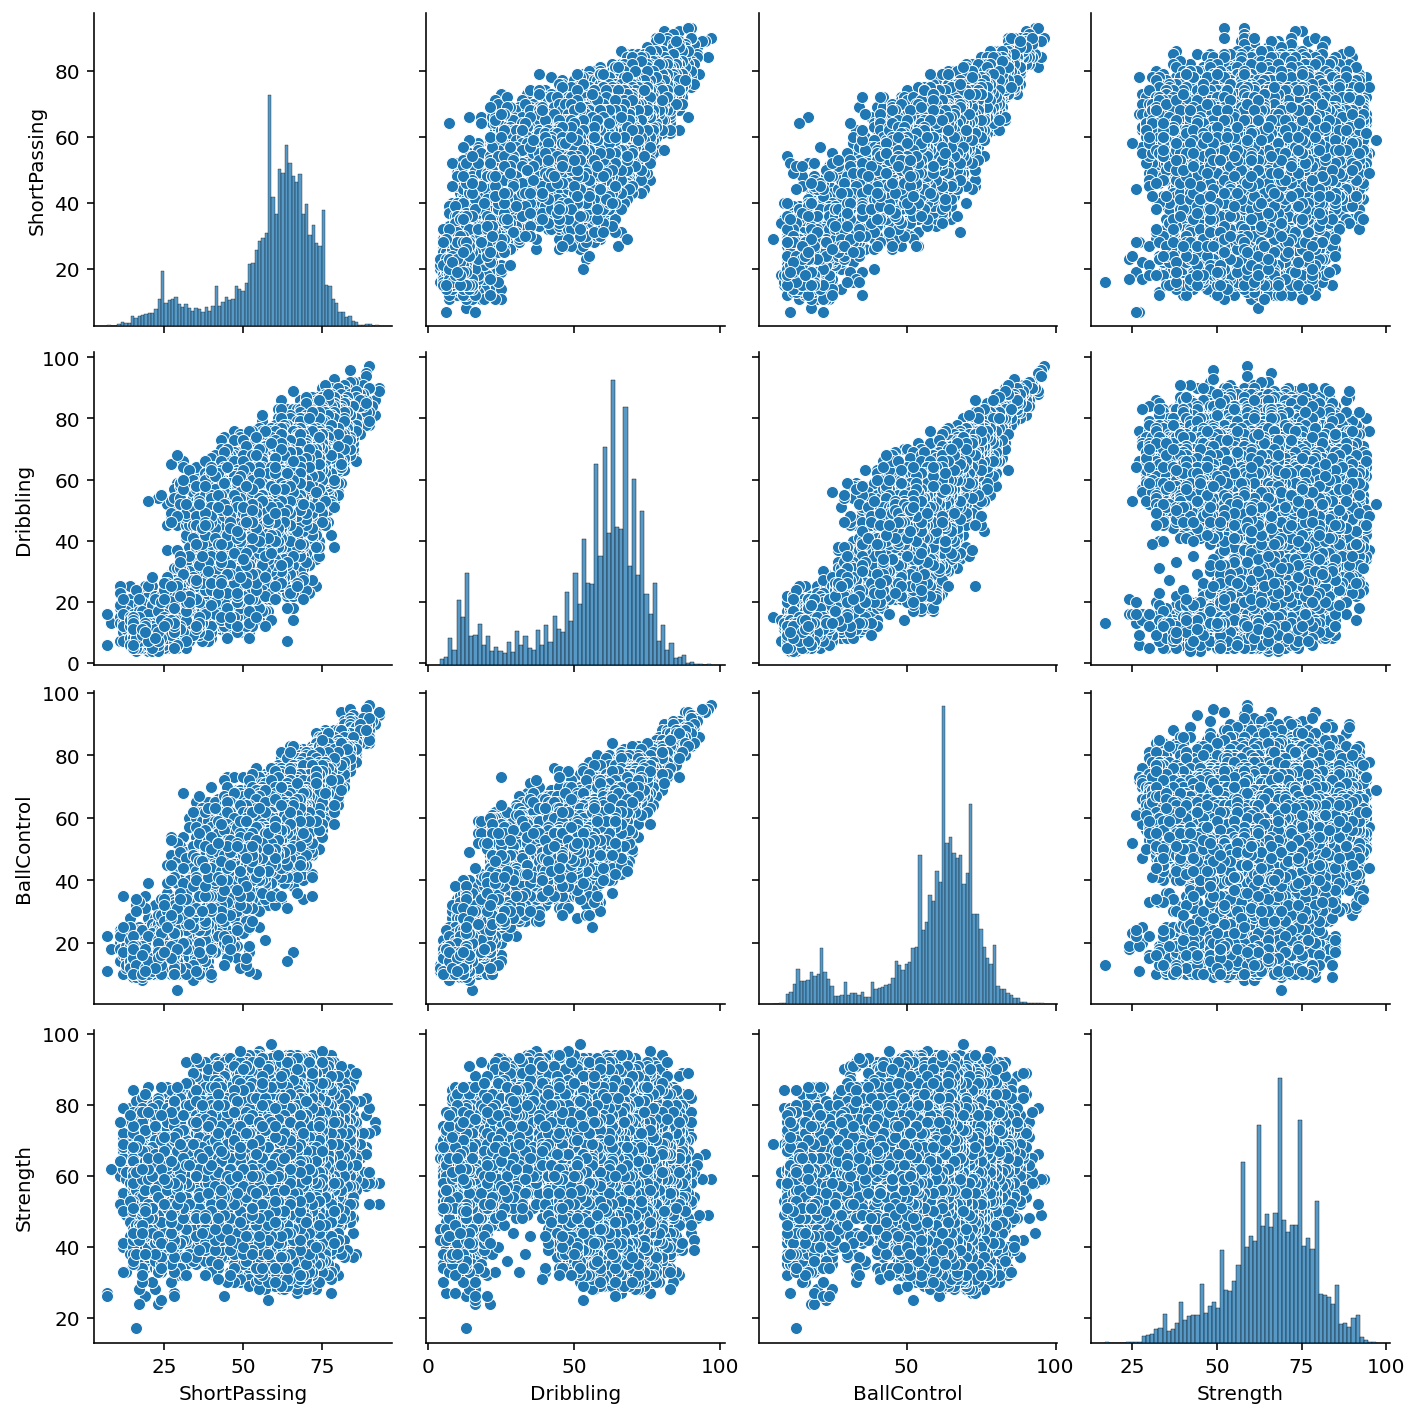

In [ ]:
sns.pairplot(data[['ShortPassing', 'Dribbling', 'BallControl', 'Strength']])

Histograms and scatter plots are good for continuous (numerical) features. Distribution of data by categorical features (that have a fixed number of possible values) can be represented with **bar charts**.

**Example 6.** Show distribution of players by age groups (under 20 yo. _young_, between 20-30 _mature_, over 30 yo. _masters_)

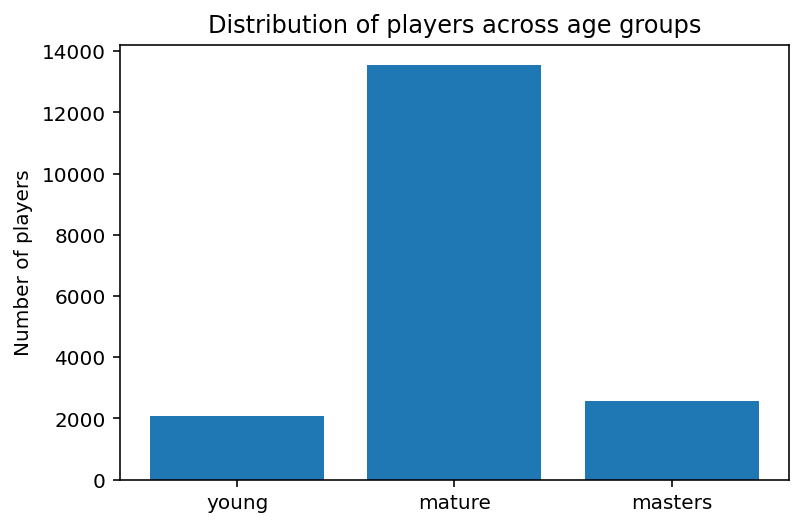

In [8]:
data['age_group'] = data.apply(lambda x: 'young' if x['Age'] < 20 else 'mature' if x['Age'] <= 30 else 'masters', axis=1)
distr = data.groupby('age_group').count().max(axis=1)[['young', 'mature', 'masters']]

plt.bar(distr.index, distr.values)
plt.ylabel('Number of players')
plt.title('Distribution of players across age groups')
plt.show()

Really often it is necessary to explore the distribution of some numerical feature based on the value of categorical one. Here comes the _boxplot_ of Seaborn library, which can show statistics of numerical features (mean, quantiles) by different value of categorical feature. Boxplot can also help to detect **outliers** - values that significantly differ from the rest. More detailed explanation [here](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51).

**Example 7.** Show _SprintSpeed_ statistics across different age groups.

_Hint_: in order to prevent printing the service information and make our pictures more attractive we can write `;` in the end of last line.

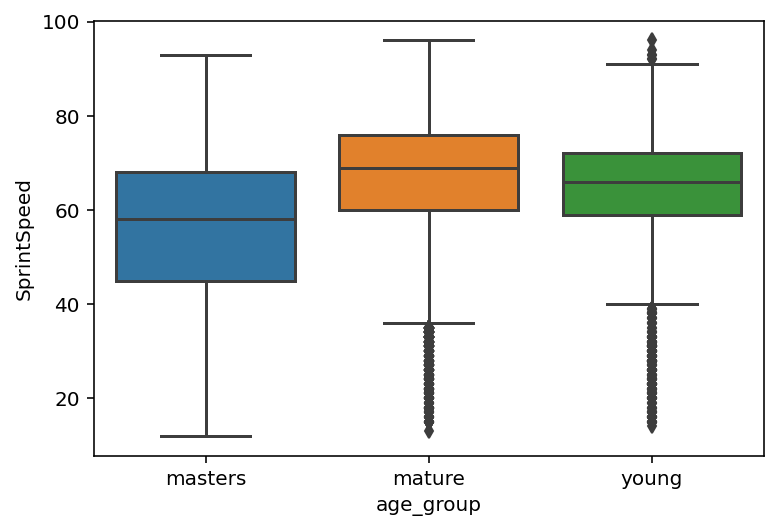

In [ ]:
sns.boxplot(x='age_group', y='SprintSpeed', data=data);

## Part 2. Minimizing Mean Squared Error. Linear Regression

We are going to predict target numerical variable $y$ for _n_ samples with the help of $x_1, x_2, ..., x_m$ _m_ features under the assumption of _liner dependence_ existence between features and target, i.e.
$$\hat{y} = w_0 + w_1 * x_1 + w_2 * x_2 + ... + w_m * x_m$$
so that Mean Squared Error between $y$ and $\hat{y}$ was the lowest possible
$$MSE = \frac{1}{n}\sum_{i=1}^n {(y_i - \hat{y})}^2 -> min_{w_0, w_1, w_2, ...w_m}$$
where $w_0$ is "free" weight component called **intercept** and $(w_1, w_2, ... w_n)$ is a **vector of coefficients**.

 ### Part 2.1 Linear Regression with one variable

Just to understand the basic principles, let's try to predict _BallControl_ score based on the _Dribbling_ score for every player. Simple Linear Regression with one feature.
$$BallControl = w_0 + w_1 * Dribbling$$

We are going to do real data science, aren't we? So let us split the available data into train and test samples. We let our model see only the train data, then we can measure it's quality on test sample.

In [ ]:
data['Dribbling'].isnull().sum()

48

In [ ]:
# check if there's a data leakage here (consult ML Mastery notebook) -> bc data tranformation is
# done BEFORE train_test_split -> which could be an indication of data leakage btw
# train data and test data

"""
We get data leakage by applying data preparation techniques to the entire dataset. 
This is not a direct type of data leakage, where we would train the model on the test dataset.
 Instead, it is an indirect type of data leakage, where some knowledge about the test dataset, 
 captured in summary statistics is available to the model during training. 
 This can make it a harder type of data leakage to spot, especially for beginners.
"""

from sklearn.model_selection import train_test_split

data.fillna({'BallControl': data['BallControl'].mean(), 
             'Dribbling': data['Dribbling'].mean()}, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data['Dribbling'].values, 
                                                    data['BallControl'].values, train_size=0.8, 
                                                    random_state=42)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [ ]:
X_train

array([[29.],
       [66.],
       [49.],
       ...,
       [69.],
       [77.],
       [52.]])

To illustrate the approach, let's use Ridge model from sklearn with _regularization_ param alpha=0. What does it mean and what it if for we will find out later on in this course. But for now I require avoiding regularization by setting regularization param to zero.

In [ ]:
# fit the model
from sklearn.linear_model import Ridge

lr = Ridge(alpha=0, random_state=42)
lr.fit(X=X_train, y=y_train)

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=42, solver='auto', tol=0.001)

In [ ]:
print(f'w_0 = {lr.intercept_}, w_1 = {lr.coef_[0]}')

w_0 = 12.575264529510775, w_1 = 0.8269419941682353


In [ ]:
# make predictions
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [ ]:
# check predictions
data['predicted_BallControl']= lr.predict(data['Dribbling'].values.reshape(-1, 1))
data[['Name', 'Dribbling', 'BallControl', 'predicted_BallControl']].head()

,Name,Dribbling,BallControl,predicted_BallControl
ID,,,,
158023,L. Messi,97.0,96.0,92.788638
20801,Cristiano Ronaldo,88.0,94.0,85.346160
190871,Neymar Jr,96.0,95.0,91.961696
193080,De Gea,18.0,42.0,27.460220
192985,K. De Bruyne,86.0,91.0,83.692276


Right now we have predictions for train and test samples. How about measure the quality of the model?

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# MAE
mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
print('MAE Test: %.3f' % mae_test)
print('MAE Train: %.3f' % mae_train)
print()

# MSE
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
print('MSE Test: %.3f'  % mse_test)
print('MSE Train: %.3f' % mse_train)

MAE Test: 4.087
MAE Train: 4.139

MSE Test: 32.075
MSE Train: 33.077


**Task 2 (0.5 point).** Write your own function for MSE calculation using the formula above. Calculate train and test MSE, compare to built-in method (_sklearn.metrics.mean_squared_error_)

In [ ]:
# # testing the possible solution -> worked fine
# import numpy as np 
  
# # Mean Squared Error 
# MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 

In [ ]:
import numpy as np 

def mse(y_true, y_pred):
    error = np.square(np.subtract(y_true,y_pred)).mean()
    return error

In [ ]:
from sklearn.metrics import mean_squared_error

assert round(mean_squared_error(y_train, y_pred_train), 9) == round(mse(y_train, y_pred_train), 9)
assert round(mean_squared_error(y_test, y_pred_test), 9) == round(mse(y_test, y_pred_test), 9)

In [ ]:
print(f'Train MSE {mse(y_train, y_pred_train)}, test MSE {mse(y_test, y_pred_test)}')

Train MSE 33.076655161866434, test MSE 32.07505360609491


**Task 3 (1.5 points).** Visualize the dependence of **test** _BallControl_ predictions and real _BallControl_ score on _Dribbling_ score. Don't forget to add axis and plot names!

In [ ]:
# Your code here

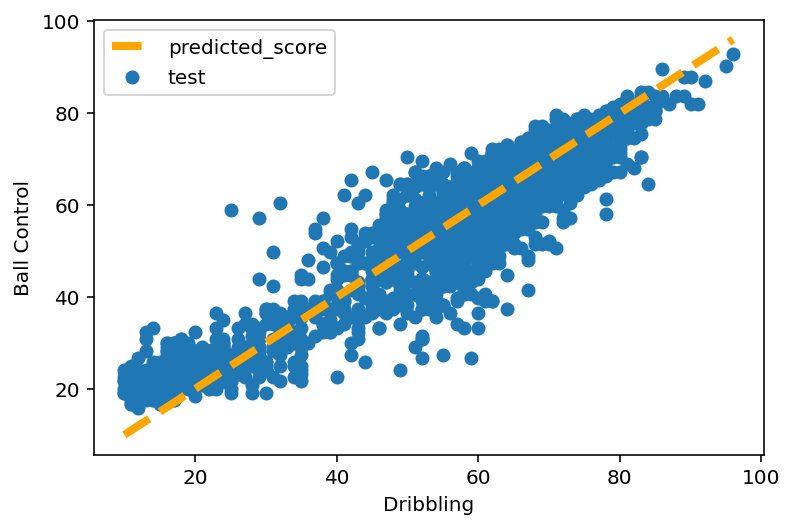

In [ ]:
# try 1
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_test, label='test')
#ax.scatter(y_pred_test, y_test, label='test_2')

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, 
        label='predicted_score', c='orange')

ax.set_xlabel('Dribbling')
ax.set_ylabel('Ball Control')
#plt.legend((y_test, y_pred_test), ('true_score', 'predicted_score'))
plt.legend()
plt.show()

### Part 2.2 Linear regression with many variables

**Task 4 (5 points).** Implement your own Linear Regression class for any number of input features and settable boolean parameter *fit_intercept*. -> NOT DONE

In this task you will work with _optimize_ module of [_scipy_](https://docs.scipy.org/doc/scipy/reference/) open-source library for mathematics, science, and engineering. You will need a function [_least_squares_](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html) that finds a coefficients for linear regression by minimizing the sum of the squares of the residuals (which is equivalent to MSE minimizing). More information about least squares approach [here](https://en.wikipedia.org/wiki/Least_squares). <br><br>
Even though this function has many parameters, you need only a few of them to complete the task (the rest will be filled in with default values automatically).
- **fun** computes a vector of residuals given weights, features and target, we provide you a function template _compute_residuals_
- **x0** this is an initial weights vector. You can either pass a vector of zeros[n_features] or fill in randomly.
- **args** are fixed arguments to _fun_ function (which we are not going to optimize). In that particular case you will need to pass X and y.


You can access optimized weights by accessing the field **.x** of object which returns by this function.

!!! IMPORTANT <br>
Please complete this assignment **without any cycles**. You may use the standard operations of matrix \ vector multiplication ans different statistic calculation with NumPy. Otherwise, your solution may not go through asserts.

In [ ]:
def compute_residuals(w, X, y):
    """
    Compute residuals when predicting y_hat as matrix product of X and transposed w
    :param w: linear regression weights, numpy.ndarrya: float64[num_features]
    :param X: training features, numpy.ndarray: float64[num_samples, num_features]
    :param y: training target, numpy.ndarray: float64[num_samples]
    :returns: vector of residuals (y_i_hat - y_i) for each sample_i in X
    
    """
    residuals = # Your code here
    return residuals

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from scipy.optimize import least_squares

class LinearRegression(BaseEstimator):
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
    
    def fit(self, X, y):
        """
        fit model weights given input features and target
        :param X: training features, numpy.ndarray: numeric[num_samples, num_features]
        :param y: training target, numpy.ndarray: numeric[num_samples]
        :returns: linear predictor with fitted weights so that train MSE is the lowest possible
        :note: weights: numpy.ndarray: float64[num_features] stored as class field

        """
        
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        
        # Save train data information. Necessary for following the uniform API
        self.X_ = X
        self.y_ = y
        self.n_features_in_ = X.shape[1]
        
        # Copy arrays and cast them to uniform type
        X_train = X.astype('float64')
        y_train = y.astype('float64')
        
        # Add dummy column of ones to X_train if we want to train an intercept - last component of future weight vector
        if self.fit_intercept:
            X_train = np.column_stack((X_train, np.ones(X_train.shape[0])))
        
        # Your code here.
        # Just follow the suggested steps: create initial weights vector,
        # apply least_squares optimizer passing the parameters described above
        # and finally extract optimized weights.
        # Remember: you need to distinguish coefficients from intercept when fit_intercept=True
        self.coef_ = 
        self.intercept_ = 
        
        # Return the classifier
        return self
        
    def predict(self, X):
        # Check is fit had been called
        check_is_fitted(self)
        
        # Input validation
        X = check_array(X)
        
        return X.dot(self.coef_) + self.intercept_

In [ ]:
#Testing area
from sklearn.utils.estimator_checks import check_estimator
from sklearn.linear_model import Ridge

lr = LinearRegression()
ridge = Ridge(alpha=0)
lr_no_intercept = LinearRegression(fit_intercept=False)
ridge_no_intercept = Ridge(alpha=0, fit_intercept=False)

#Check compatibility with Sklearn framework and apply some spesific internal tests
check_estimator(lr)
check_estimator(lr_no_intercept)

#Compare model accuracy with Ridge(0) from Sklearn
data.fillna({'BallControl': data['BallControl'].mean()
             , 'Dribbling': data['Dribbling'].mean()
             , 'Strength': data['Strength'].mean()}, inplace=True)

X_sample, y_sample = data[['Dribbling', 'Strength']], data['BallControl']
lr.fit(X_sample, y_sample)
ridge.fit(X_sample, y_sample)

assert np.allclose(lr.predict(X_sample), ridge.predict(X_sample), rtol=1e-03), "Your model with intercept not accurate enough!"
lr_no_intercept.fit(X_sample, y_sample)
ridge_no_intercept.fit(X_sample, y_sample)
assert np.allclose(lr_no_intercept.predict(X_sample), ridge_no_intercept.predict(X_sample), rtol=1e-03), "Your model without intercept not accurate enough!"

Let's add more features in order to predict Dribbling score more accurately.

In [ ]:
features = ['BallControl', 'ShortPassing', 'Strength', 'Weight_float', 'Weight_kg']

target = 'Dribbling'
for feat in features:
    data.fillna({feat: data[feat].mean()}, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data[features].values, 
                                                    data[target].values, 
                                                    train_size=0.8, random_state=42)

In [ ]:
lr = Ridge(0)
lr.fit(X=X_train, y=y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print(f'Train MSE {mean_squared_error(y_train, y_pred_train)}, \
test MSE {mean_squared_error(y_test, y_pred_test)}')

Train MSE 37.42104741581608, test MSE 34.97590780016676


In [ ]:
print(f'w_0 = {lr.intercept_}, w_1, w_2, w_3, w_4, w_5 = {lr.coef_}')

w_0 = 11.752435636765313, w_1, w_2, w_3, w_4, w_5 = [ 1.09799307e+00 -5.16659979e-02 -1.26383529e-01  2.88287939e+07
 -6.34995462e+07]


That is not ok, two last weight components are too large, and they vary depending on the run! Although the result seems better our model would behave unexpectadly to the patterns in data it has never seen! Large weights and weights instability are the sign of [**overfitting**](https://en.wikipedia.org/wiki/Overfitting).  <br><br>
According to the definition it is "_the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably_". But what does it actually mean?

Assume that we have a player whose weight in kg was calculated with some tiny error, let's say +=1g.

In [ ]:
player = data[features + [target]].iloc[0:2]
player['Predicted_dribbling'] = lr.predict(player[features].values)
player.head()

,BallControl,ShortPassing,Strength,Weight_float,Weight_kg,Dribbling,Predicted_dribbling
ID,,,,,,,
158023,96.0,90.0,59.0,159.0,72.186,97.0,96.261350
20801,94.0,81.0,79.0,183.0,83.082,88.0,90.675615


Predictions are pretty good if the data is _pure_. Let's add some noise to _Weight_kg_ feature:

In [ ]:
player['Weight_kg'] = player['Weight_kg'] + [-0.001, 0.001]
player['Predicted_dribbling_with_error'] = lr.predict(player[features].values)
player.head()

,BallControl,ShortPassing,Strength,Weight_float,Weight_kg,Dribbling,Predicted_dribbling,Predicted_dribbling_with_error
ID,,,,,,,,
158023,96.0,90.0,59.0,159.0,71.171,97.0,96.261350,6.445214e+07
20801,94.0,81.0,79.0,183.0,84.097,88.0,90.675615,-6.445195e+07


Predicted dribbling value has changed significantly! Look at how this tiny **1g** error leads to extremly big or small dribbling!

The reason behind it is strange unstable behaviour is **collinearity** between Weight and Weight_kg features, what means that Weight_kg can be linearly predicted from Weight. As a matter of fact they represent the same essense but in different scales. <br><br>
**Multicollinearity** describes a more general case, when one feature can be predicted by linear combination of some other features.<br><br>
Collinearity is really close related to **correlation** - degree to which a pair of variables are linearly related. Collinearity origins from Linear Algebra and Geometry whereas Correlation is a term from Statistics. Anyway all of this three terms refer to **linearly dependent features**, which is really bad for Linear Models.

But why it is so bad? The main reason is that Linear Regression tries to capture the contribution of each feature to target _independently_, which obviously is not possible in terms of feature multicolliearity.<br><br>
There are a whole bunch of really interesting thoughts that can help to capture the intuition behind it [here](https://stats.stackexchange.com/questions/1149/is-there-an-intuitive-explanation-why-multicollinearity-is-a-problem-in-linear-r). I'd citate one of the examples provided.<br><br>
_Assume that two people collaborated and accomplished scientific discovery. It is easy to tell their unique contributions (who did what) when two are totally different persons (one is theory guy and the other is good at experiment), while it is difficult to distinguish their unique influences (coefficients in regression) when they are twins acting similarly._

There are a few approaches how to prevent overfitting and overcome multicollinearity.
- Drop features
- Combine features
- Regularization


Regularization is something we are going to speak about in the next modules. Combining features is problem-specific and could easily trigger a _holy_war_ due to ambiguity of approaches. Let's focus on simpliest - drop one of the features from the correlated pair.<br>
At first we need to define those pairs of features, **correlation matrix** comes to rescue! Each cell in the table shows the correlation between two variables. We use dataframe in-built method _corr_ in combination with seaborn _heatmap_.

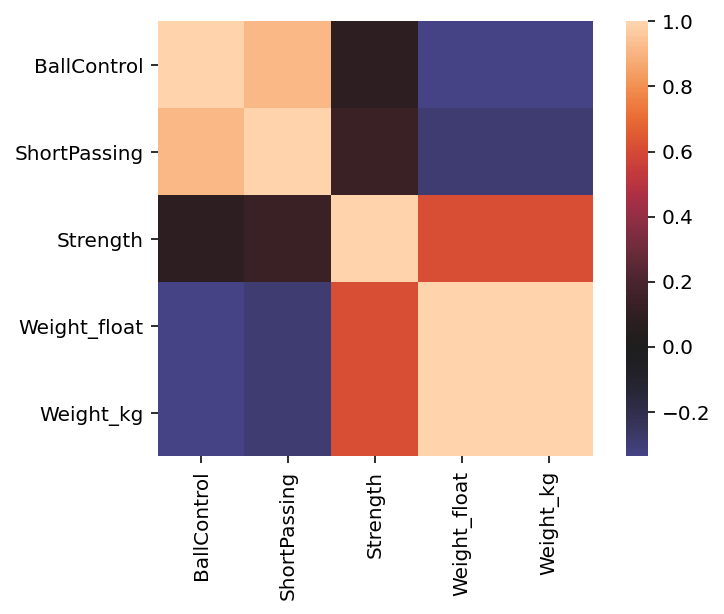

In [ ]:
from seaborn import heatmap

heatmap(data[features].corr(method='pearson'), center=0, square=True)
plt.show()

In [ ]:
features = ['BallControl', 'ShortPassing', 'Strength', 'Weight_kg']

X_train, X_test, y_train, y_test = train_test_split(data[features].values, 
                                                    data[target].values, train_size=0.8, random_state=42)

lr = Ridge(alpha=0)
lr.fit(X=X_train, y=y_train)

player['Predicted_dribbling_with_error'] = lr.predict(player[features].values)
player.head()

,BallControl,ShortPassing,Strength,Weight_float,Weight_kg,Dribbling,Predicted_dribbling,Predicted_dribbling_with_error
ID,,,,,,,,
158023,96.0,90.0,59.0,159.0,71.171,97.0,96.261350,96.384906
20801,94.0,81.0,79.0,183.0,84.097,88.0,90.675615,90.551928


### Part 2.3 Putting all together

**Task 5 (up to 5 points).** Build a Linear Regression model for _Value_ prediction for every football player and validate it. You **have to** use either your custom Linear Regression class or `sklearn.linear_model.Ridge` with regularization param alpha=0. Steps you need to follow:
- Extract float number from _Value_ field in DataFrame (**0.5 points**)
- Сhoose more features that you expect to influence on player _Value_ (at least 10)
- Plot feature correlation matrix. (**0.5 points**)
- Drop features that are highly correlated with each other (_abs_(corr) > 0.9) one by one until no correlated pairs left. _Hint_: you may reuse code from Task_9 in HW_1 for automatic correlated pairs selection. (**1.5 points**)
- Split data into train/test with some proportion (**0.5 points**)
- Train a model on train dataset, make predictions both for train and test. (**0.5 points**)
- Measure the model quality in terms of MSE in train and test samples,  (**0.5 points**)
- Write a short report about the work done. Why did you take these particular features? Can you find a logical explanation for high correlation of some of your features? Are you satisfied with the quality of predictions? etc. (**1 point**)

**Penalties**
- **-1 point** if used a different model besides custom Linear Regression or `sklearn.linear_model.Ridge` with regularization param alpha=0
- **-0.5 points** if number of selected features BEFORE removal of linearly dependent ones is less than 10.
- **-0.5 points** if did not remove linearly dependent features before training the model.

### Attempt 1 -> testing some hypothesis and checking for the highly correlated features

In [5]:
data = pd.read_csv("data.csv", index_col='ID')

## path to the df in GDrive
# data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/RS_School/ml-intro-2021/ml-intro-2021/2_linear_regression/data.csv", 
#                    index_col='ID')

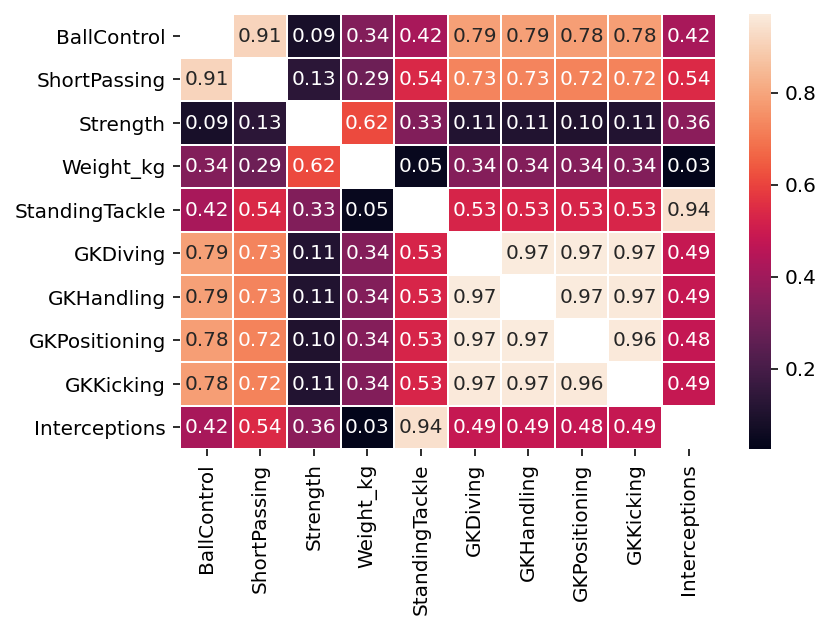

In [9]:
# Correlation for the selected features TOP 10
feature_2 = ['BallControl', 'ShortPassing', 'Strength', 'Weight_kg', 'StandingTackle',
             'GKDiving', 'GKHandling', 'GKPositioning', 'GKKicking', 'Interceptions']

correlation_df = data[feature_2].corr(method='pearson').abs()
correlation_df = correlation_df[correlation_df != 1]

# Visualisation of the correlation
sns.heatmap(correlation_df, annot=True, fmt=".2f", linewidths=.5);

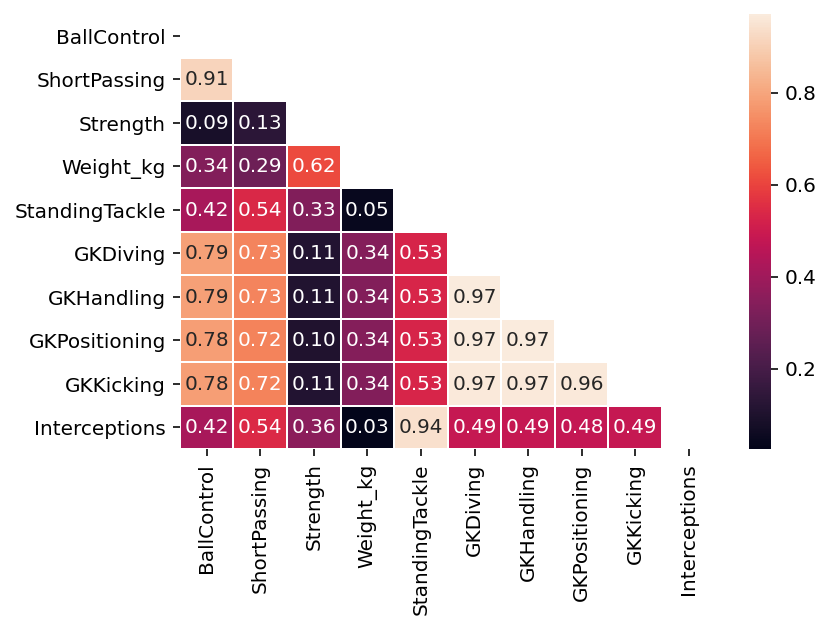

In [10]:
# correlation w\o 1 
matrix = np.triu(correlation_df) # this method is deleting NaN's from the heatmap
sns.heatmap(correlation_df, annot=True, fmt=".2f", linewidths=.5, mask=matrix);

In [ ]:
# Tabular view of the correlated data 
series = correlation_df.unstack(level=-1)
series.drop_duplicates().sort_values(ascending=False).nlargest(20)

In [11]:
# Fillings Nan's with median, not mean
data.fillna({'ShortPassing': data['ShortPassing'].median(), 
             'Strength': data['Strength'].median(),
             'Weight_kg': data['Weight_kg'].median(),
             'StandingTackle': data['StandingTackle'].median(),
             'GKDiving': data['GKDiving'].median(),
             'GKHandling': data['GKHandling'].median(),
             'GKPositioning': data['GKPositioning'].median(),
             'GKKicking': data['GKKicking'].median(),
             'Interceptions': data['Interceptions'].median(),
             'Strength': data['Strength'].median(),
             'BallControl': data['BallControl'].median(),
             },inplace=True)

In [12]:
# Converting Value column to float
data['Value'] = data['Value'].str.extract(r'([0-9]+)').astype(float)

In [15]:
# test learining with the selected features
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

feature_2 = ['BallControl', 'ShortPassing', 'Strength', 'Weight_kg', 'StandingTackle',
             'GKDiving', 'GKHandling', 'GKPositioning', 'GKKicking', 'Interceptions']

target = 'Value'

X_train, X_test, y_train, y_test = train_test_split(data[feature_2].values, 
                                                    data[target].values, train_size=0.8, random_state=42)

lr = Ridge(alpha=0)
lr.fit(X=X_train, y=y_train)

player = data[feature_2 + [target]].iloc[0:2]
player['Predicted_value'] = lr.predict(player[feature_2].values)
player.head()

,BallControl,ShortPassing,Strength,Weight_kg,StandingTackle,GKDiving,GKHandling,GKPositioning,GKKicking,Interceptions,Value,Predicted_value
ID,,,,,,,,,,,,
158023,96.0,90.0,59.0,72.186,28.0,6.0,11.0,14.0,15.0,22.0,110.0,111.878512
20801,94.0,81.0,79.0,83.082,31.0,7.0,11.0,14.0,15.0,29.0,77.0,131.272191


In [ ]:
# checking prediction
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# MAE
mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
print('MAE Test: %.3f' % mae_test)
print('MAE Train: %.3f' % mae_train)
print()

# MSE
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
print('MSE Test: %.3f'  % mse_test)
print('MSE Train: %.3f' % mse_train)

MAE Test: 256.283
MAE Train: 252.632

MSE Test: 129743.534
MSE Train: 126849.216


### Attempt 2 -> grade me based on this solution plz

In [215]:
# Building a second attempt 

# data load
data = pd.read_csv("data.csv", index_col='ID')

## path to the df in GDrive
# data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/RS_School/ml-intro-2021/ml-intro-2021/2_linear_regression/data.csv", 
#                    index_col='ID')


# Deviding X and y 
# Assign X
X = data

# dropping NaN's rows from Height before the split in order for the X and y to have the same shape
X.dropna(subset=['Height'], axis = 0, inplace=True) 

# Assign y
y = X['Value'].str.extract(r'([0-9]+)').astype(float)

# drop y from X
X.drop(['Value'], axis=1, inplace=True)

In [216]:
X.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [217]:
# Dropping some useless(IMHO) columns such as fotos, flags, etc
# Loaned from dropped bc it has >90% of the missing data

X.drop(['Photo', 'Flag', 'Club Logo', 
        'Unnamed: 0', 'Loaned From', 'Real Face'], axis=1, inplace=True)

In [218]:
# checking the shape
X.shape, y.shape

((18159, 81), (18159, 1))

In [189]:
# checking the number of missing rows + percent
from tabulate import tabulate

top = 30
print(tabulate(
    sorted(list(zip(X.columns, X.isnull().sum(), X.isnull().sum() / X.shape[0] * 100)), 
           key=lambda x: -x[2])[:top], headers=['col_name', 'null_cnt', 'null_perc']))

col_name                null_cnt    null_perc
--------------------  ----------  -----------
LS                          2085     11.4516
ST                          2085     11.4516
RS                          2085     11.4516
LW                          2085     11.4516
LF                          2085     11.4516
CF                          2085     11.4516
RF                          2085     11.4516
RW                          2085     11.4516
LAM                         2085     11.4516
CAM                         2085     11.4516
RAM                         2085     11.4516
LM                          2085     11.4516
LCM                         2085     11.4516
CM                          2085     11.4516
RCM                         2085     11.4516
RM                          2085     11.4516
LWB                         2085     11.4516
LDM                         2085     11.4516
CDM                         2085     11.4516
RDM                         2085     11.4516
RWB     

In [219]:
X.head()

,Name,Age,Nationality,Overall,Potential,Club,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,De Gea,27,Spain,91,93,Manchester United,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [220]:
# Feature engineering Weight column
X['Weight_float'] = X['Weight'].str.extract(r'([0-9]+)lbs').astype(float)
X['Weight_float'].fillna(X['Weight_float'].median())
POUND_TO_KILO = 0.454
X['Weight_kg'] = X.apply(lambda row: row['Weight_float'] * POUND_TO_KILO, axis=1)

In [221]:
# Dropping Weight_float and Weight columns as they're the same and could distract
# the model - espicially if we're using Linear class model

X.drop(['Weight_float'], axis=1, inplace = True)
X.drop(['Weight'], axis=1, inplace = True)

In [222]:
# Feature engineering with Wage and Release Clause - in order to be aling them with Value
# in terms of the format
X['Wage'] = X['Wage'].str.extract(r'([0-9]+)').astype(float)
X['Release Clause'] = X['Release Clause'].str.extract(r'([0-9]+)').astype(float)

In [223]:
# Feature engineering with Height 

#X.dropna(subset=['Height'], axis = 0, inplace=True)
X['Height'] = X['Height'].str.split("'")
X['Height'] = X['Height'].apply(lambda row: float(row[0]) * 0.3048 + float(row[1]) * 0.0254)
X.fillna({'Height': X['Height'].median()})

,Name,Age,Nationality,Overall,Potential,Club,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,...,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_kg
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,565.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",2021,1.7018,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,...,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.0,72.186
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,405.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",2022,1.8796,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,...,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.0,83.082
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,290.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",2022,1.7526,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,...,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.0,68.100
193080,De Gea,27,Spain,91,93,Manchester United,260.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",2020,1.9304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.0,76.272
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,355.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",2023,1.8034,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,...,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.0,69.916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238813,J. Lundstram,19,England,47,65,Crewe Alexandra,1.0,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,"May 3, 2017",2019,1.7526,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,...,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143.0,60.836
243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,1.0,1098,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,21.0,"Mar 19, 2018",2020,1.9050,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,...,32+2,32+2,32+2,29+2,23.0,52

0

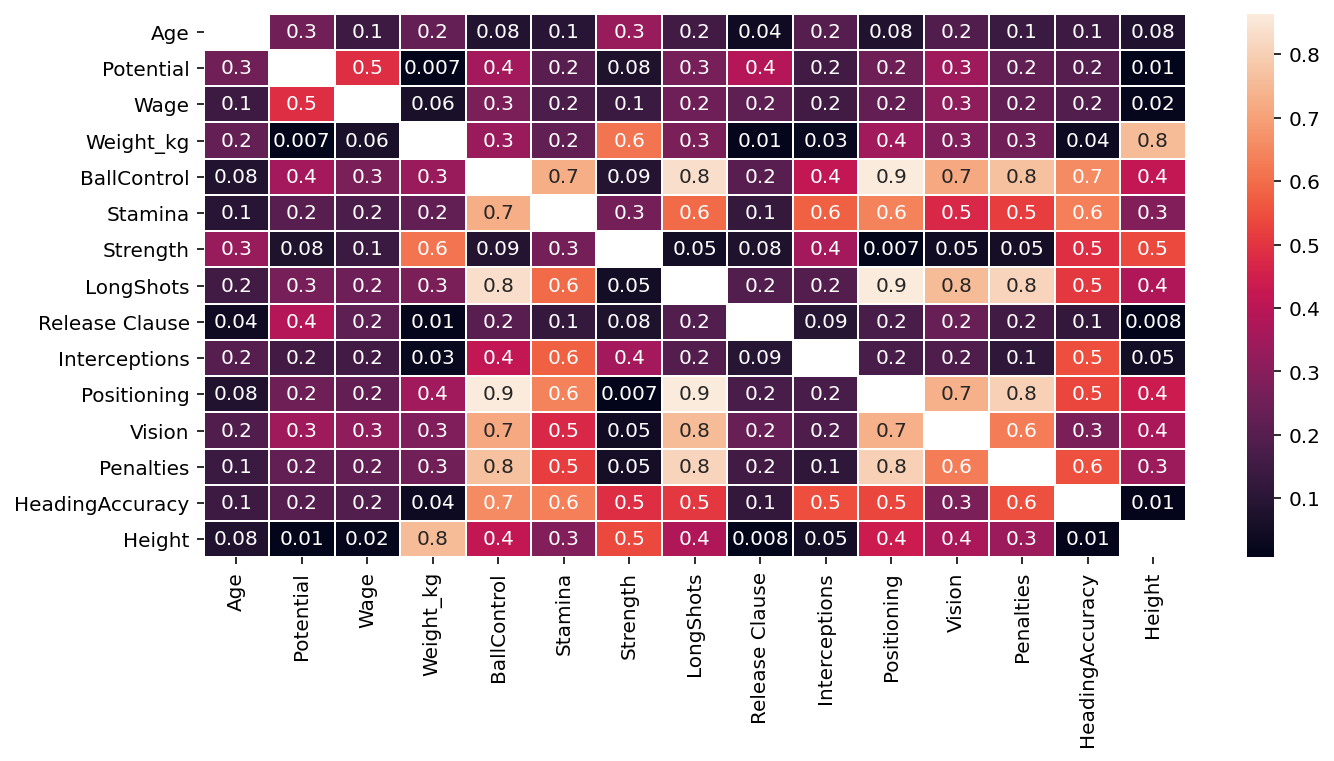

In [224]:
# Correlation for the another selected features TOP 15
features_3 = ['Age', 'Potential', 'Wage', 'Weight_kg', 'BallControl',
             'Stamina', 'Strength', 'LongShots', 'Release Clause', 'Interceptions',
             'Positioning', 'Vision', 'Penalties', 'HeadingAccuracy', 'Height']

correlation_df = X[feature_3].corr(method='pearson').abs()
correlation_df = correlation_df[correlation_df != 1]

# Visualisation of the correlation
plt.rcParams['figure.figsize'] = (11, 5)
sns.heatmap(correlation_df, annot=True, fmt=".1g", linewidths=0.5);

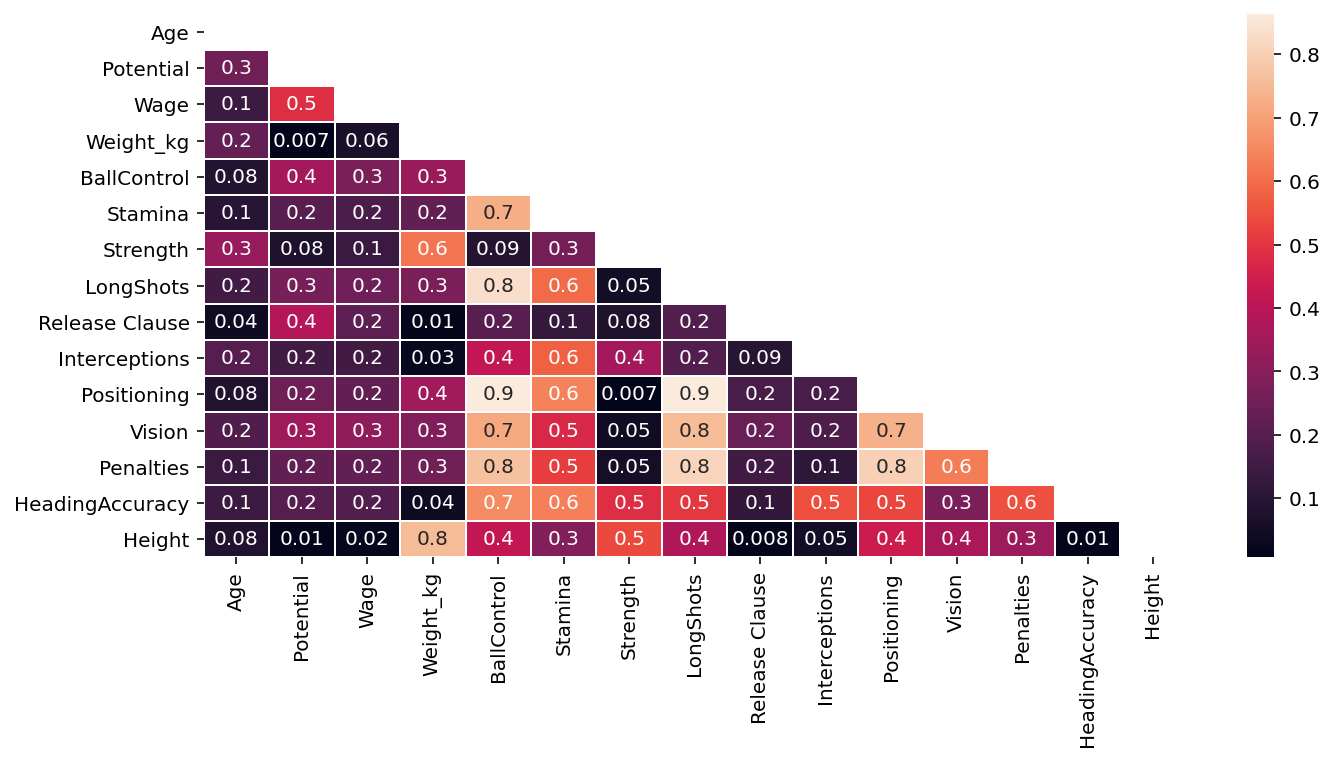

In [225]:
# correlation w\o 1 
matrix = np.triu(correlation_df) # this method is deleting NaN's from the heatmap
sns.heatmap(correlation_df, annot=True, fmt=".1g", linewidths=.5, mask=matrix);

In [226]:
# tabular correlation
series = correlation_df.unstack(level=-1)
series.drop_duplicates().sort_values(ascending=False).nlargest(20)

BallControl    Positioning        0.863915
LongShots      Positioning        0.861080
BallControl    LongShots          0.836047
LongShots      Penalties          0.812446
Positioning    Penalties          0.801268
BallControl    Penalties          0.769791
Weight_kg      Height             0.754678
LongShots      Vision             0.753701
Positioning    Vision             0.734367
BallControl    Stamina            0.728604
               Vision             0.718411
               HeadingAccuracy    0.658175
Stamina        Positioning        0.640982
               HeadingAccuracy    0.634589
Vision         Penalties          0.632927
Weight_kg      Strength           0.615798
Stamina        LongShots          0.596110
               Interceptions      0.576353
Penalties      HeadingAccuracy    0.551978
Interceptions  HeadingAccuracy    0.548689
dtype: float64

In [227]:
X.shape, y.shape

((18159, 81), (18159, 1))

In [ ]:
# let's try to build predictions for the feature 3 set

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

for feat in features_3:
    X.fillna({feat: X[feat].median()}, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X[features_3].values, 
                                                    y, train_size=0.8, random_state=42)

lr = Ridge(alpha=0)
lr.fit(X=X_train, y=y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# player = X[features_3 + [y]].iloc[0:5]
# player['Predicted_value'] = lr.predict(player[features_3].values)
# player.head()

In [233]:
# checking prediction
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# MAE
mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
print('MAE Test: %.3f' % mae_test)
print('MAE Train: %.3f' % mae_train)
print()

# MSE
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
print('MSE Test: %.3f'  % mse_test)
print('MSE Train: %.3f' % mse_train)

MAE Test: 218.107
MAE Train: 214.546

MSE Test: 75765.972
MSE Train: 73072.862


In [235]:
# Checking for the outlier data

from numpy import percentile
# Example of calculating quartiles on the data.
'''
We can then calculate the cutoﬀ for outliers as 1.5 times the IQR and subtract 
this cut-oﬀ from the 25th percentile and add it to the 75th percentile 
to give the actual limits on the data.
'''

# calcute the iterquantile range
q25, q75 = percentile(X[features_3], 25), percentile(X[features_3], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25,q75,iqr))


# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# identify outliers
outliers = [x for x in X[features_3] if all(x) < lower or all(x) > upper]
print('Identified outliers: %d' % len(outliers))

# remove outliers
outliers_removed = [x for x in X[features_3] if all(x) >= lower and all(x) <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=24.000, 75th=69.000, IQR=45.000
Identified outliers: 0
Non-outlier observations: 15


#### Report 
I've tried several attempts. 
<br>The first one was with the features_2 number of features. There're several problems with the that set of features: 1) high-cross correlation and 2) GK (Gol Keaper) data points were distracting the model, so I've decided to get rid of them. 

<br>The result was
*   MAE Test: 256.283
*   MAE Train: 252.632
*   MSE Test: 129743.534
*   MSE Train: 126849.216

<br>The second attempt was to create another set of features - features_3 and take the data according to some sense in my head about the phisic of the a football player + skipping the high cross correlated data I had previously in the first attempt.

<br>The result was
*   MAE Test: 218.107
*   MAE Train: 214.546
*   MSE Test: 75765.972
*   MSE Train: 73072.862

It was a raw test of the seletected 15 features in the feature_3 set, I think this result is far away from optimal one.

<br>Some To Do's
- check outlier info for the feature_3 -> checked, it seems there're no outliers
- add some more features in the feature_3 set 
- do some more data cleaning on the new features which would be selected in the feature_3 set 
- Run SelectKBest or RFE to check for the feature importance 

### Code for the experimentations - 1

In [ ]:
# ## Correlation map
# # checking for all df for correlation 
# correlation_df = data.corr(method='pearson').abs()
# correlation_df = correlation_df[correlation_df != 1]
# #correlation_df

# # Tabular correlation info
# series = correlation_df.unstack(level=-1)
# series.sort_values(ascending=False).nlargest(50)

In [ ]:
# # Visualisation of the correlation with 1
# sns.heatmap(correlation_df, annot=True, fmt=".2f", linewidths=.5)

In [ ]:
# # correlation w\o 1 
# matrix = np.triu(correlation_df) # this method is deleting NaN's from the heatmap
# sns.heatmap(correlation_df, annot=True, fmt=".2f", linewidths=.5, mask=matrix)

In [ ]:
# # Drop features that are highly correlated with each other (abs(corr) > 0.9)
# # checking for all df for correlation 
# correlation_df = data.corr(method='pearson').abs()
# correlation_df = correlation_df[correlation_df != 1]
# #correlation_df

# # Tabular correlation info
# series = correlation_df.unstack(level=-1)
# series.sort_values(ascending=False).nlargest(50)

predicted_BallControl  Dribbling                1.000000
Dribbling              predicted_BallControl    1.000000
Weight_float           Weight_kg                1.000000
Weight_kg              Weight_float             1.000000
SlidingTackle          StandingTackle           0.974659
StandingTackle         SlidingTackle            0.974659
GKDiving               GKReflexes               0.973320
GKReflexes             GKDiving                 0.973320
Overall                Unnamed: 0               0.972791
Unnamed: 0             Overall                  0.972791
GKHandling             GKDiving                 0.970288
GKDiving               GKHandling               0.970288
GKHandling             GKReflexes               0.970264
GKReflexes             GKHandling               0.970264
GKPositioning          GKReflexes               0.970130
GKReflexes             GKPositioning            0.970130
GKDiving               GKPositioning            0.969872
GKPositioning          GKDiving

### Code for the experimentations - 2

#### Extract float number from Value field in DataFrame (0.5 points)


In [ ]:
# # Extract float number from Value field in DataFrame (0.5 points)
# data['Value'] = data['Value'].str.extract(r'([0-9]+)').astype(float)
# #data.Value.astype('float64')

#### Experiment

In [ ]:
# # explore the number of features using RFE algo
# from numpy import mean
# from numpy import std
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import Ridge
# from sklearn.pipeline import Pipeline
# import matplotlib.pyplot as plt




# # get a list of models to evaluate
# def get_models():
# 	models = dict()
 
# 	for i in range(1, 11):
# 		rfe = RFE(estimator=Ridge(), n_features_to_select=i)
# 		model = Ridge(alpha=0)
# 		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
# 	return models

# # evaluate a given model using cross-validation
# def evaluate_model(model, X, y):
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# 	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# 	return scores

